### Joseph Bu <br />
### github: @josephhbu <br />
### USC ID: 3752428485
---

## HW 1 <br />

Vertebral Column Data Set <br />
This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.


**(a) Download the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column.**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

**(b) Pre-Processing and Exploratory data analysis:**

In [53]:
column_names = [
    "pelvic_incidence", 
    "pelvic_tilt", 
    "lumbar_lordosis_angle", 
    "sacral_slope", 
    "pelvic_radius", 
    "grade_of_spondylolisthesis", 
    "Class"
]
data = pd.read_csv("vertebral_column_data/column_2C.dat", 
                   delim_whitespace=True,
                   names=column_names)
data["Class"] = data["Class"].map({"NO": 0, "AB": 1})
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


i.
Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

/Users/josephbu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josephbu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josephbu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/josephbu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

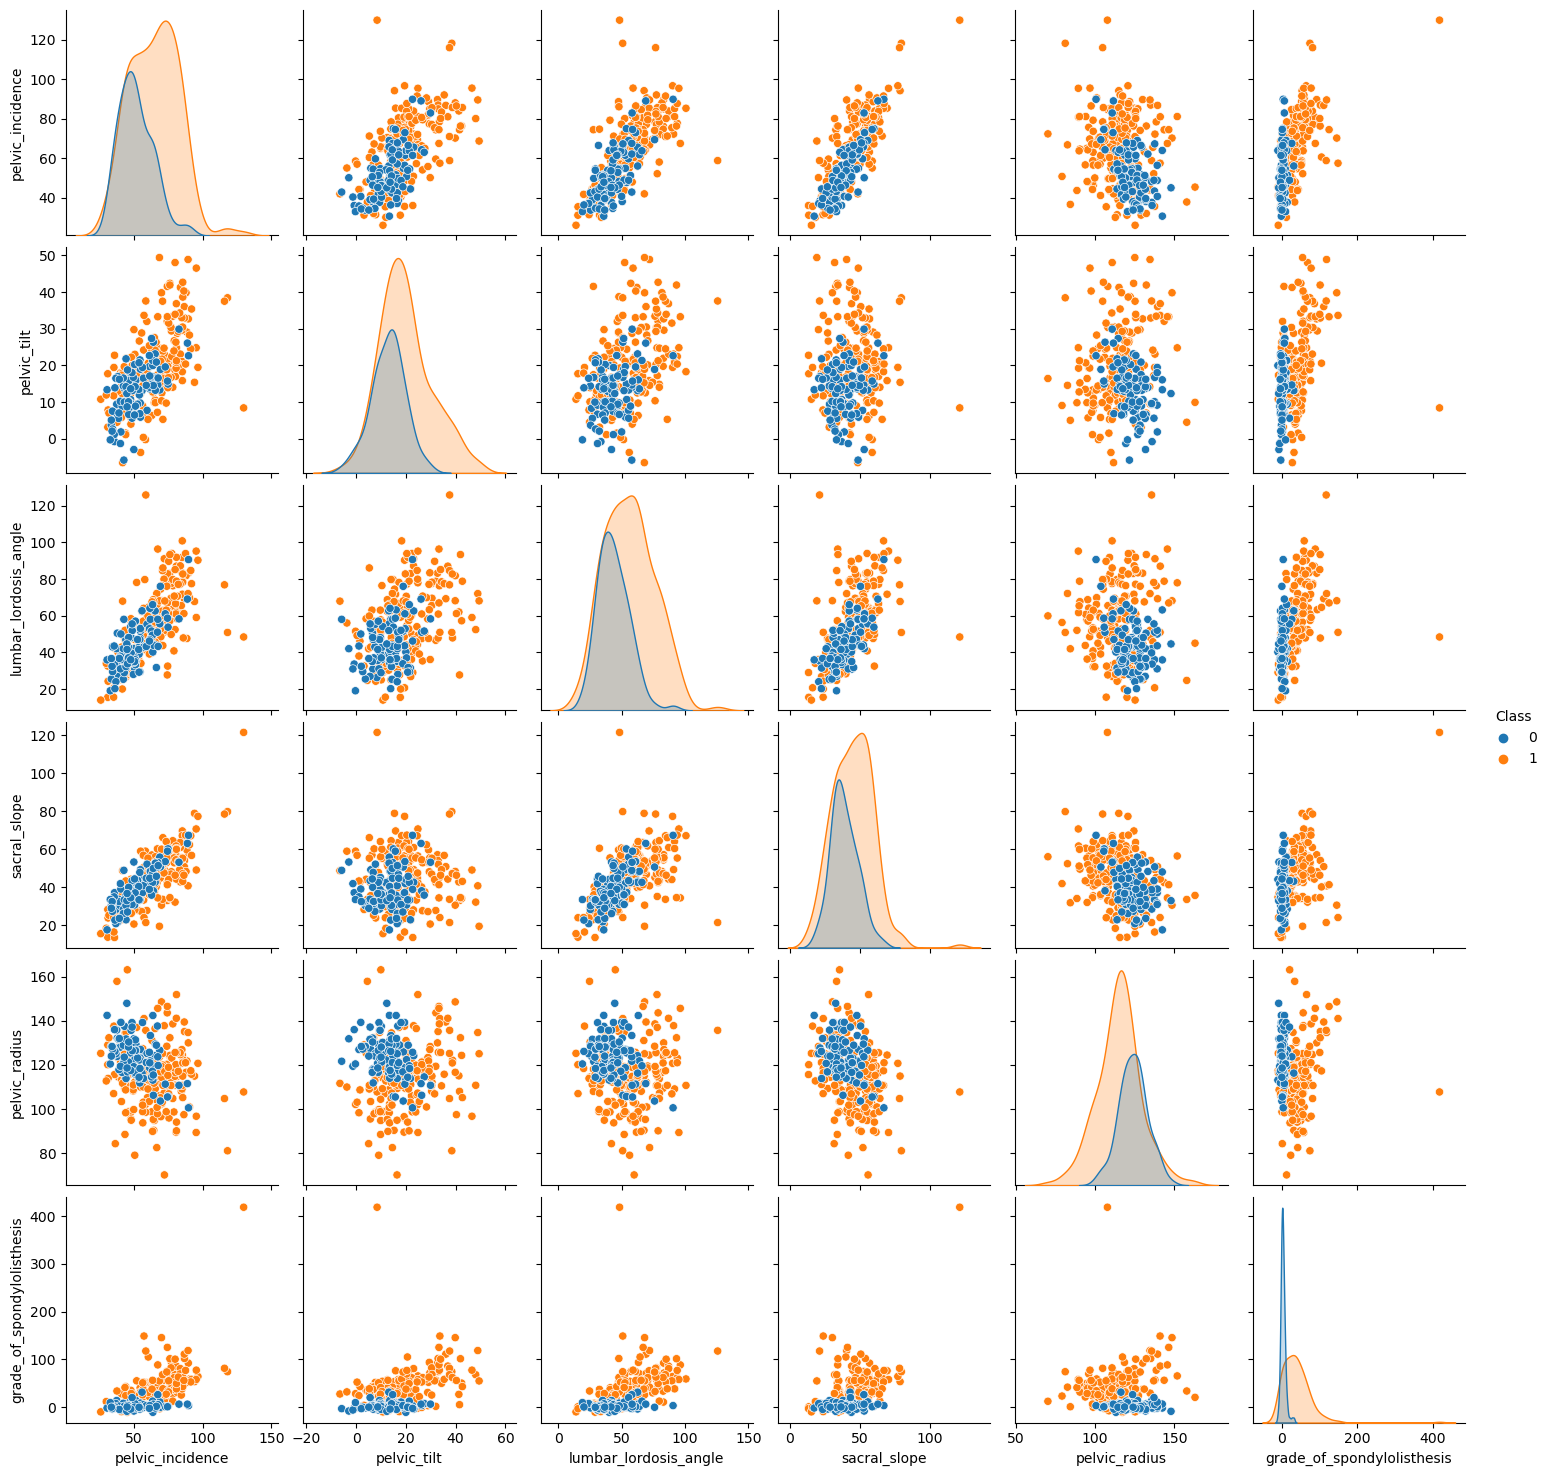

In [54]:
features = column_names[:6]
sns.pairplot(data, hue="Class", vars=features)
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

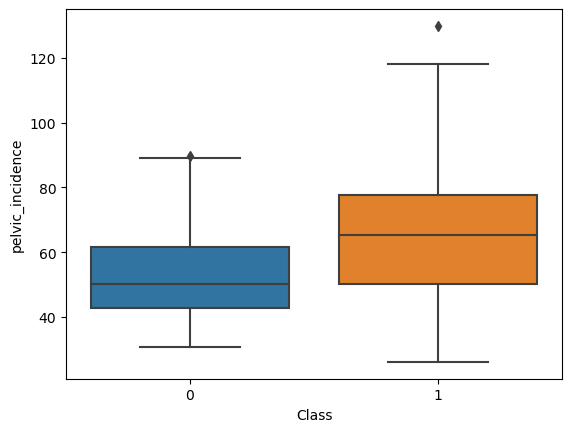

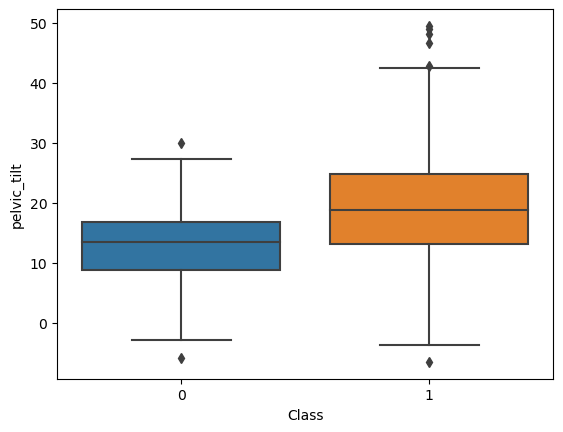

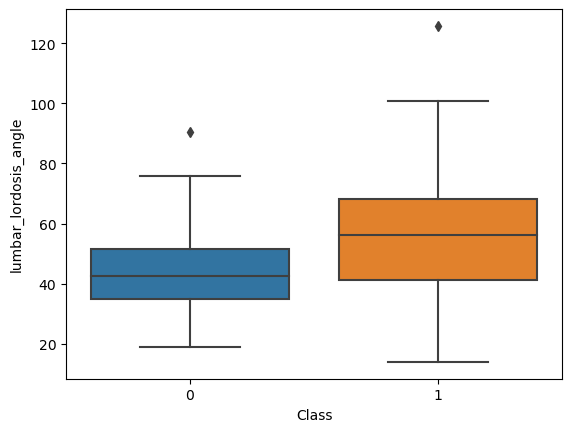

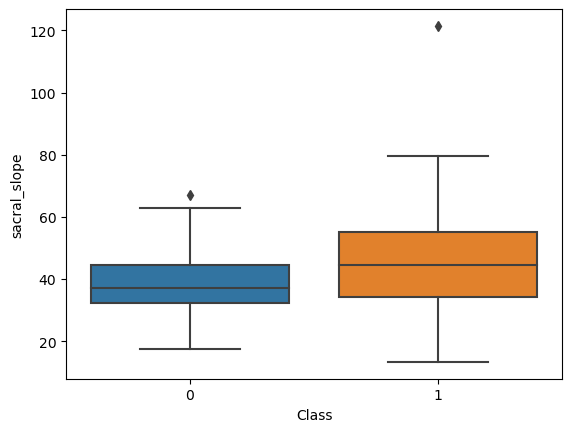

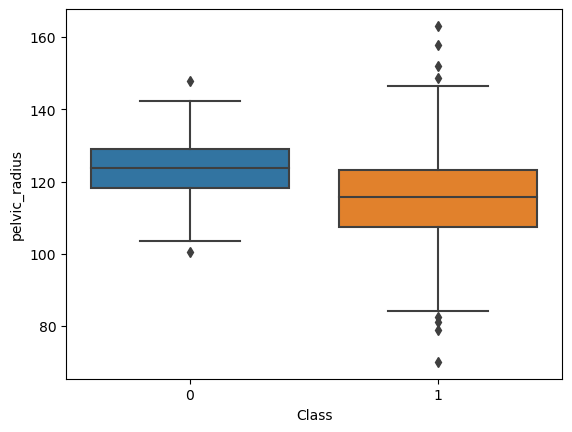

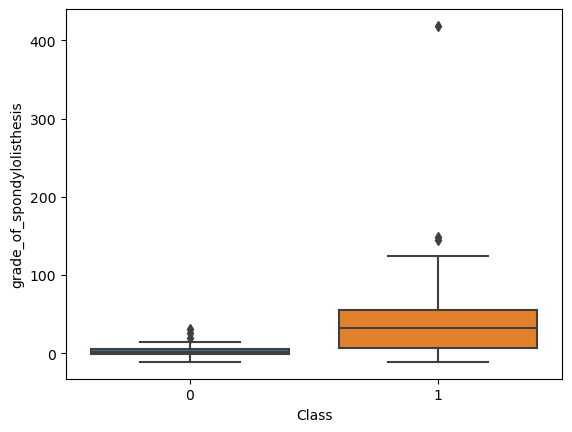

In [55]:
for var in features:
    sns.boxplot(x="Class", y=var, data=data)
    plt.show()

iii.
Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set

In [56]:
labels = 'Class'
train_0 = data[data[labels] == 0].iloc[:70]
train_1 = data[data[labels] == 1].iloc[:140]
train_df = pd.concat([train_0, train_1])

test_df = data.drop(train_df.index)

print(train_df.shape)
print(test_df.shape)

(210, 7)
(100, 7)


**(c)
Classification using KNN on Vertebral Column Data Set**

i.
Write code for k-nearest neighbors with Euclidean metric (or use a software
package)

In [8]:
X_train = train_df[features]
y_train = train_df[labels]
X_test = test_df[features]
y_test = test_df[labels]

ii.
Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for k ∈ {208,205, . . . ,7 ,4 , 1,} (in reverse order).** **You are welcome to use smaller increments of k. Which k* is the most suitable k among those values? Calculate the confusion matrix, true positive rate true negative rate, precision,and F1-score when k = k*.


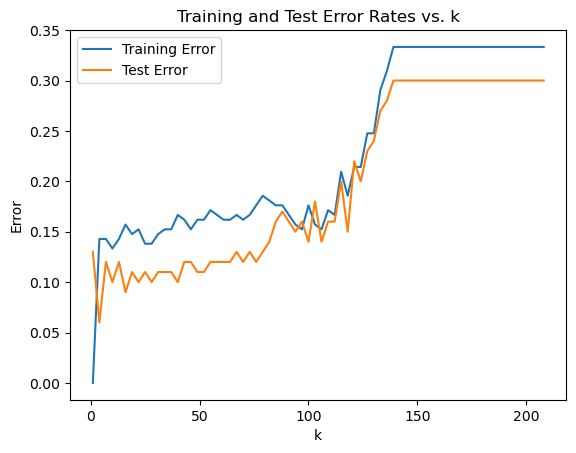

In [18]:
k_values = list(range(1, 209, 3))
k_values.reverse()

train_errors = []
test_errors = []
min_test_error = 100
k_star = 0
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    y_train_pred = knn_model.predict(X_train)
    y_test_pred = knn_model.predict(X_test)

    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    if test_error < min_test_error:
        min_test_error = test_error
        k_star = k

    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(k_values, train_errors, label='Training Error')
plt.plot(k_values, test_errors, label='Test Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Training and Test Error Rates vs. k')
plt.legend() 
plt.show()


In [19]:
print("Minimum Test Error: ", min_test_error)
print("k*: ", k_star)

Minimum Test Error:  0.06000000000000005
k*:  4


The k* is 4 as it provides the minimum test error.

In [25]:
knn_k_star_model = KNeighborsClassifier(n_neighbors=k_star)
knn_k_star_model.fit(X_train, y_train)
y_test_k_star = knn_k_star_model.predict(X_test)

cm = confusion_matrix(y_test, y_test_k_star)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[25  5]
 [ 1 69]]


In [26]:
tn, fp, fn, tp = cm.ravel()
true_pos_rate = tp / (tp + fn)
true_neg_rate = tn / (tn + fp)
print("True Positive Rate: ", true_pos_rate)
print("True Negative Rate: ", true_neg_rate)

True Positive Rate:  0.9857142857142858
True Negative Rate:  0.8333333333333334


In [28]:
print("Precision and F1-Score")
print(classification_report(y_test, y_test_k_star))

Precision and F1-Score
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

    accuracy                           0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100



iii.
Since the computation time depends on the size of the training set, one may only use a subset of the training set. Plot the best test error rate, which is obtained by some value of k, against the size of training set, when the size of training set is N ∈ {10, 20, 30 , . . . ,210}.
Note: for each N, select your training set by choosing the first [N/3] rows of Class 0 and the first [N − N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for each N, select the optimal k from a set starting from k = 1, increasing by 5. For example, if N = 200, the optimal k is selected from {1 ,6 ,11 , . . . ,196}.
This plot is called a
Learning Curve.

Training Set Size: 10, Optimal k: 1, Best Test Error: 0.25
Training Set Size: 20, Optimal k: 6, Best Test Error: 0.19999999999999996
Training Set Size: 30, Optimal k: 1, Best Test Error: 0.21999999999999997
Training Set Size: 40, Optimal k: 11, Best Test Error: 0.25
Training Set Size: 50, Optimal k: 26, Best Test Error: 0.30000000000000004
Training Set Size: 60, Optimal k: 21, Best Test Error: 0.29000000000000004
Training Set Size: 70, Optimal k: 26, Best Test Error: 0.29000000000000004
Training Set Size: 80, Optimal k: 31, Best Test Error: 0.29000000000000004
Training Set Size: 90, Optimal k: 41, Best Test Error: 0.29000000000000004
Training Set Size: 100, Optimal k: 6, Best Test Error: 0.25
Training Set Size: 110, Optimal k: 6, Best Test Error: 0.21999999999999997
Training Set Size: 120, Optimal k: 16, Best Test Error: 0.17000000000000004
Training Set Size: 130, Optimal k: 16, Best Test Error: 0.16000000000000003
Training Set Size: 140, Optimal k: 16, Best Test Error: 0.1500000000000

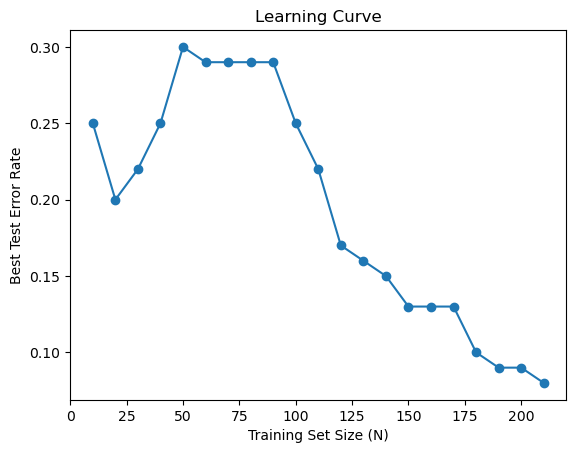

In [33]:
N_set = list(range(10, 211, 10))
best_test_errors = []

for N in N_set:
    n_train_0 = train_df[train_df[labels] == 0].iloc[:(N // 3)]
    n_train_1 = train_df[train_df[labels] == 1].iloc[:(N - N // 3)]
    n_train_df = pd.concat([n_train_0, n_train_1])
    
    k_values = list(range(1, N, 5))
    optimal_k = 0
    best_test_error = 100
                    
    X_n_train = n_train_df[features]
    y_n_train = n_train_df[labels]
    
    for k in k_values:
        knn_n_model = KNeighborsClassifier(n_neighbors=k)
        knn_n_model.fit(X_n_train, y_n_train)
        y_n_test_pred = knn_n_model.predict(X_test)
                    
        n_error = 1 - accuracy_score(y_test, y_n_test_pred)
        if n_error < best_test_error:
            best_test_error = n_error
            optimal_k = k
        
    best_test_errors.append(best_test_error)
    print(f"Training Set Size: {N}, Optimal k: {optimal_k}, Best Test Error: {best_test_error}")
    
plt.plot(N_set, best_test_errors, marker='o')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.title('Learning Curve')
plt.show()
    

**(d)
Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗) in a table. Use all of your training data and select the best k when {1, 6, 11, . . . , 196}**

i.
Minkowski Distance:
    
A. which becomes Manhattan Distance with p = 1.

In [48]:
k_values = list(range(1, 197, 5))

min_test_error_manhattan = 100
best_k_manhattan = 0
for k in k_values:
    knn_manhattan_model = KNeighborsClassifier(n_neighbors=k, p=1)
    knn_manhattan_model.fit(X_train, y_train)
    y_test_pred = knn_manhattan_model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < min_test_error_manhattan:
        min_test_error_manhattan = error
        best_k_manhattan = k
print("Manhattan Distance, p = 1:")
print(f"Best k: {best_k_manhattan}, Minimum Test Error: {min_test_error_manhattan}")

Manhattan Distance, p = 1:
Best k: 6, Minimum Test error: 0.10999999999999999


**B.
with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?***

In [49]:
log_10_p_values = np.arange(0.1, 1.1, 0.1)

min_test_error_log = 100
best_p_val = 0

for log_10_p_val in log_10_p_values:
    p_val = 10 ** log_10_p_val
    knn_log_model = KNeighborsClassifier(n_neighbors=best_k_manhattan, p=p_val)
    knn_log_model.fit(X_train, y_train)
    y_test_pred = knn_log_model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < min_test_error_log:
        min_test_error_log = error
        best_p_val = log_10_p_val
print(f"Best log10(p): {best_p_val}, Minimum Test Error: {min_test_error_log}")
    
    
    

Best log10(p): 0.6000000000000001, Minimum Test Error: 0.06000000000000005


C.
which becomes Chebyshev Distance with p → ∞

In [52]:
min_test_error_chebyshev = 100
best_k_chebyshev = 0
for k in k_values:
    knn_chebyshev_model = KNeighborsClassifier(n_neighbors=k, metric="chebyshev")
    knn_chebyshev_model.fit(X_train, y_train)
    y_test_pred = knn_chebyshev_model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < min_test_error_chebyshev:
        min_test_error_chebyshev = error
        best_k_chebyshev = k
print("Chebyshev distance:")
print(f"Best k: {best_k_chebyshev}, Minimum Test Error: {min_test_error_chebyshev}")

Chebyshev distance:
Best k: 16, Minimum Test Error: 0.07999999999999996


**ii.
Mahalanobis Distance.**

In [64]:
min_test_error_mahalanobis= 100
best_k_mahalanobis = 0

covariance_matrix = np.cov(X_train, rowvar=False)
for k in k_values:
    knn_mahalanobis_model = KNeighborsClassifier(n_neighbors=k, metric="mahalanobis", metric_params={'VI': np.linalg.inv(covariance_matrix)})
    knn_mahalanobis_model.fit(X_train, y_train)
    y_test_pred = knn_mahalanobis_model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < min_test_error_mahalanobis:
        min_test_error_mahalanobis = error
        best_k_mahalanobis = k
print("Mahalanobis distance:")
print(f"Best k: {best_k_mahalanobis}, Minimum Test Error: {min_test_error_mahalanobis}")

Mahalanobis distance:
Best k: 1, Minimum Test Error: 0.17000000000000004


In [70]:
results = pd.DataFrame({"Distance Metric": 
                        ["Manhattan",
                        "log10(p)",
                        "Chebyshev",
                        "Mahalanobis"],
                        "Optimal k": [best_k_manhattan,
                                      best_p_val,   
                                      best_k_chebyshev,
                                      best_k_mahalanobis],
                        "Test Error": [min_test_error_manhattan,
                                       min_test_error_log,
                                       min_test_error_chebyshev,
                                       min_test_error_mahalanobis],
                        })
results

,Distance Metric,Optimal k,Test Error
0,Manhattan,6.0,0.11
1,log10(p),0.6,0.06
2,Chebyshev,16.0,0.08
3,Mahalanobis,1.0,0.17


(e)
The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from the query/test data point. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away. Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . ,196}

In [72]:
best_error_euclidean = 100
best_k_euclidean = 0
for k in k_values:
    knn_euclidean_model = KNeighborsClassifier(n_neighbors=k, weights="distance")
    knn_euclidean_model.fit(X_train, y_train)
    y_test_pred = knn_euclidean_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < best_error_euclidean:
        best_error_euclidean = error
        best_k_euclidean = k
        
print("Weighted Decision Euclidean:")
print(f"Best k: {best_k_euclidean}, Best Test Error: {best_error_euclidean}")

Weighted Decision Euclidean:
Best k: 6, Best Test Error: 0.09999999999999998


In [73]:
best_error_manhattan = 100
best_k_manhattan = 0
for k in k_values:
    knn_manhattan_model = KNeighborsClassifier(n_neighbors=k, p=1, weights="distance")
    knn_manhattan_model.fit(X_train, y_train)
    y_test_pred = knn_manhattan_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < best_error_manhattan:
        best_error_manhattan = error
        best_k_manhattan = k
        
print("Weighted Decision Manhattan:")
print(f"Best k: {best_k_manhattan}, Best Test Error: {best_error_manhattan}")

Weighted Decision Manhattan:
Best k: 26, Best Test Error: 0.09999999999999998


In [74]:
best_error_chebyshev = 100
best_k_chebyshev = 0
for k in k_values:
    knn_chebyshev_model = KNeighborsClassifier(n_neighbors=k, metric="chebyshev", weights="distance")
    knn_chebyshev_model.fit(X_train, y_train)
    y_test_pred = knn_chebyshev_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_test_pred)
    if error < best_error_chebyshev:
        best_error_chebyshev = error
        best_k_chebyshev = k
        
print("Weighted Decision Chebyshev:")
print(f"Best k: {best_k_chebyshev}, Best Test Error: {best_error_chebyshev}")

Weighted Decision Chebyshev:
Best k: 16, Best Test Error: 0.10999999999999999


In [77]:
weighted_decision_results = pd.DataFrame({"Weighted Decision": 
                        ["Manhattan",
                        "Euclidean",
                        "Chebyshev",],
                        "Optimal k": [best_k_euclidean,
                                      best_k_manhattan,   
                                      best_k_chebyshev,],
                        "Test Error": [best_error_euclidean,
                                       best_error_manhattan,
                                       min_test_error_chebyshev],
                        })
weighted_decision_results

,Weighted Decision,Optimal k,Test Error
0,Manhattan,6,0.10
1,Euclidean,26,0.10
2,Chebyshev,16,0.08


References/Citations:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
https://www.geeksforgeeks.org/difference-between-score-and-accuracy_score-methods-in-scikit-learn/
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

https://stackoverflow.com/questions/77615883/attributeerror-flags-object-has-no-attribute-c-contiguous
https://stackoverflow.com/questions/59862791/knn-mahalanobis-error-size-of-v-does-not-match-python
https://www.geeksforgeeks.org/reading-dat-file-in-python/
